In [1]:
import anndata
import cellpath as cp
import cellpath.visual as visual
import cp_benchmark as bmk 
import numpy as np  
import pandas as pd
import scvelo as scv
import anndata 
import scanpy as sc

# Simulation

In [ ]:
adata = anndata.read_h5ad("D:/L/data/example_data/simulated/linear.h5ad")

if 'counts_spliced' in adata.layers:
    adata.layers['spliced'] = adata.layers.pop('counts_spliced')
if 'counts_unspliced' in adata.layers:
    adata.layers['unspliced'] = adata.layers.pop('counts_unspliced')
    
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
scv.tl.velocity(adata)
#参数：k_neighs =10,threshold = 0.4, cutoff_length = 7, length_bias = 0.5

In [ ]:
adata = anndata.read_h5ad("D:/L/data/example_data/simulated/Dyngen/Bifurcating.h5ad")
sc.pp.neighbors(adata, n_neighbors = 20,n_pcs = 20)
#参数：k_neighs =10,threshold = 0.4, cutoff_length = 7, length_bias = 0.5

In [35]:
adata = anndata.read_h5ad("D:/L/data/example_data/simulated/Dyngen/Trifurcating.h5ad")
#参数：k_neighs =10,threshold = 0.4, cutoff_length = 7, length_bias = 0.5

In [45]:
adata = anndata.read_h5ad("D:/L/data/example_data/simulated/trifurcating.h5ad")

if 'counts_spliced' in adata.layers: 
    adata.layers['spliced'] = adata.layers.pop('counts_spliced') 
if 'counts_unspliced' in adata.layers: 
    adata.layers['unspliced'] = adata.layers.pop('counts_unspliced')

sc.pp.normalize_total(adata, target_sum=1e4) 
sc.pp.log1p(adata) 
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata) 
sc.tl.umap(adata) 
scv.tl.velocity(adata)
#参数：k_neighs =15,threshold = 0.6, cutoff_length = 7, length_bias = 0.5,

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [53]:
adata = anndata.read_h5ad("C:/Users/user/Desktop/TRY/CellPath-master/example_data/simulated/cycletree.h5ad")
#参数：k_neighs =10,threshold = 0.4, cutoff_length = 7, length_bias = 0.5

# Real

In [ ]:
adata = anndata.read_h5ad("D:/L/data/example_data/real/mouse pancreatic endocrine/pe_clust.h5ad")
#参数：k_neighs =9,threshold = 0.5, cutoff_length = None, length_bias = 0.5,

In [ ]:
adata = anndata.read_h5ad("D:/L/data/example_data/real/human forebrain/fb_clust.h5ad")
sc.tl.umap(adata)
#参数：k_neighs =9,threshold = 0.5, cutoff_length = None, length_bias = 0.5,

In [2]:
adata = anndata.read_h5ad("D:/L/data/example_data/real/Mouse hematopoiesis/adata_day4_scvelo.h5ad")
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=100)
scv.tl.velocity(adata)
#参数：k_neighs =9,threshold = 0.5, cutoff_length = None, length_bias = 0.5,

Filtered out 2071 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [2]:
adata = anndata.read_h5ad("D:/L/data/example_data/real/cellcycle/cell_cycle.h5ad")
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=20)
#sc.tl.umap(adata)
genes_of_interest = ['CDK1', 'CCNA2']
G1_cells = adata[adata.obs['cell_cycle_phase'] == 'G1']
mean_expression = G1_cells[:, genes_of_interest].to_df().mean(axis=1)
threshold = 1.5
G1_cells.obs['G1_chk'] = np.where(mean_expression < threshold, 'G1_chk', 'Other')
G1_chk = G1_cells[G1_cells.obs['G1_chk'] == 'G1_chk']
adata.obs['cell_cycle_phase'] = adata.obs['cell_cycle_phase'].astype(str)
idx_G1_chk = G1_chk.obs_names
adata.obs.loc[idx_G1_chk, 'cell_cycle_phase'] = 'G1_chk'
adata.obs.rename(columns = {'cell_cycle_phase':'clusters'},inplace = True)
scv.tl.velocity(adata)
#参数：k_neighs =9,threshold = 0.5, cutoff_length = None, length_bias = 0.5,

Filtered out 44673 genes that are detected 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:17) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


# Calculation

In [3]:
cellpath_obj = cp.CellPath(adata = adata, preprocess = True)
num_metacells = int(adata.n_obs/10)
flavor = "k-means"
cellpath_obj.meta_cell_construction(flavor = flavor, n_clusters = num_metacells, include_unspliced = True, standardize = True)
cellpath_obj.meta_cell_graph(k_neighs = 9, pruning = True, distance_scalar = 1)

C:\jupter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


using k-means


C:\jupter\lib\site-packages\sklearn\linear_model\_ridge.py:187: DeprecationWarning: The 'sym_pos' keyword is deprecated and should be replaced by using 'assume_a = "pos"'. 'sym_pos' will be removed in SciPy 1.11.0.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\jupter\lib\site-packages\sklearn\linear_model\_ridge.py:187: DeprecationWarning: The 'sym_pos' keyword is deprecated and should be replaced by using 'assume_a = "pos"'. 'sym_pos' will be removed in SciPy 1.11.0.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\jupter\lib\site-packages\sklearn\linear_model\_ridge.py:187: DeprecationWarning: The 'sym_pos' keyword is deprecated and should be replaced by using 'assume_a = "pos"'. 'sym_pos' will be removed in SciPy 1.11.0.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\jupter\lib\site-packages\sklearn\linear_model\_ridge.py:187: DeprecationWarning: The 'sym_pos' keyword is deprecated and should be replaced by using 'assume_a = "pos"'. 'sym_pos' will be removed in SciPy 1.11.0.

Meta-cell constructed, number of meta-cells: 106
Meta-cell level neighborhood graph constructed


C:\jupter\lib\site-packages\sklearn\linear_model\_ridge.py:187: DeprecationWarning: The 'sym_pos' keyword is deprecated and should be replaced by using 'assume_a = "pos"'. 'sym_pos' will be removed in SciPy 1.11.0.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\jupter\lib\site-packages\sklearn\linear_model\_ridge.py:187: DeprecationWarning: The 'sym_pos' keyword is deprecated and should be replaced by using 'assume_a = "pos"'. 'sym_pos' will be removed in SciPy 1.11.0.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\jupter\lib\site-packages\sklearn\linear_model\_ridge.py:187: DeprecationWarning: The 'sym_pos' keyword is deprecated and should be replaced by using 'assume_a = "pos"'. 'sym_pos' will be removed in SciPy 1.11.0.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\jupter\lib\site-packages\sklearn\linear_model\_ridge.py:187: DeprecationWarning: The 'sym_pos' keyword is deprecated and should be replaced by using 'assume_a = "pos"'. 'sym_pos' will be removed in SciPy 1.11.0.

In [4]:
cellpath_obj.meta_paths_finding(threshold = 0.5, cutoff_length = None, length_bias = 0.5, mode = "fast")
cellpath_obj.first_order_pt(num_trajs = None, prop_insert = 0.000)

C:\jupter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\jupter\lib\site-packages\networkx\convert_matrix.py:687: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


conduct quality control
selected path (starting_ending):
start_end:  0_101 , len:  6 newly covered: 6
start_end:  100_9 , len:  6 newly covered: 6
start_end:  23_60 , len:  5 newly covered: 5
start_end:  3_92 , len:  4 newly covered: 4
start_end:  23_104 , len:  6 newly covered: 3
start_end:  27_13 , len:  4 newly covered: 4
start_end:  64_39 , len:  4 newly covered: 4
start_end:  88_5 , len:  6 newly covered: 3
start_end:  96_2 , len:  4 newly covered: 4
start_end:  23_43 , len:  6 newly covered: 2
start_end:  100_31 , len:  6 newly covered: 2
start_end:  49_94 , len:  3 newly covered: 3
start_end:  74_73 , len:  3 newly covered: 3
start_end:  81_21 , len:  3 newly covered: 3
start_end:  23_48 , len:  5 newly covered: 1
start_end:  23_13 , len:  5 newly covered: 1
start_end:  23_69 , len:  5 newly covered: 1
start_end:  23_91 , len:  5 newly covered: 1
start_end:  66_57 , len:  3 newly covered: 2
start_end:  105_15 , len:  3 newly covered: 2
start_end:  4_33 , len:  2 newly covered: 2

# Merics

In [56]:
kt = bmk.cellpath_kt(cellpath_obj)
average_kt = sum(kt.values())/len(kt)
average_kt

C:\jupter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9648806099987561

In [57]:
sm = bmk.cellpath_spearman(cellpath_obj)
average_sm = sum(sm.values())/len(sm)
average_sm

0.9965210947571294

# Visualization

In [ ]:
scv.tl.velocity_graph(adata)

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color='clusters',dpi=500)

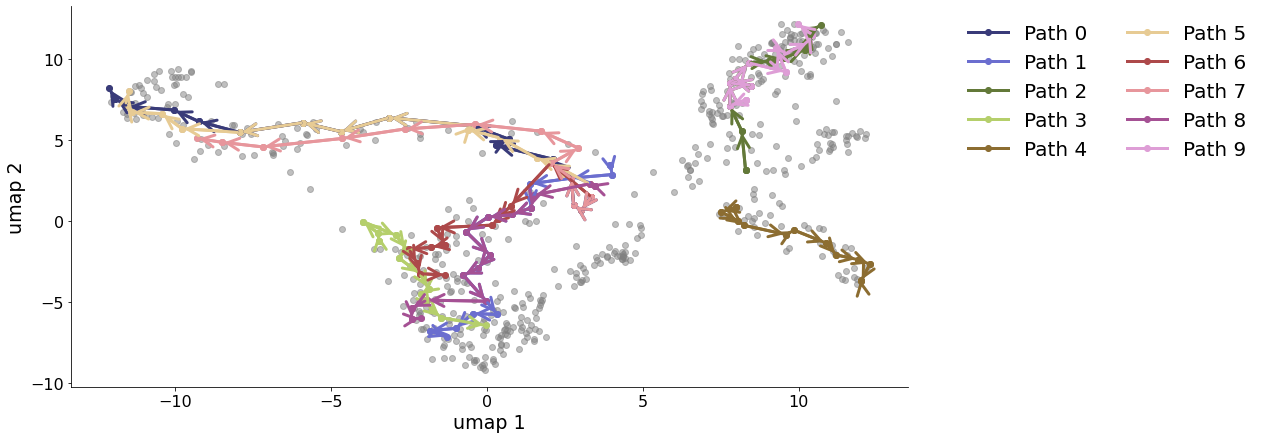

In [8]:
visual.meta_traj_visual(cellpath_obj, basis="umap", trajs = 10, axis = True, save_as = None, figsize = (15,7),legend_pos = "best")

In [ ]:
visual.first_order_approx_pt(cellpath_obj, basis="umap", trajs = 2, figsize=(12,9), save_as= None)